In [1]:
#Imports (If you don't have one of these libraries: pip install name_library)
import os
from nilearn import image
from nilearn import plotting
import numpy as np
import pandas as pd

C:\Users\davide\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\davide\anaconda3\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
## Files and parameters ##
# Folder where you have your data (maps, atlas and csv file with labels)
main_folder = "C:\\Users\\davide\\Documents\\GitHub\\fmri_scripts\\dti" 
# Files #
tfce_file = 'tbss_tfce_corrp_tstat1.nii' # This is your TFCE MAP (control > athletes)
mean_FA_skeleton_file = 'mean_FA_skeleton.nii'
all_FA_skeletonised_file = 'all_FA_skeletonised.nii' # N volumes = N participants (14 controls, 14 athletes)
bck_img_file = 'MNI152_T1_1mm_Brain.nii' # Background anatomical file
atlas_file = 'JHU-ICBM-labels-1mm.nii' # This is the John Hopkins University Atlas (white matter) 
atlas_labels_file = 'atlas.csv' # Name of the CSV file with the lables (id = n roi in the atlas_file)

In [4]:
# Now we need to load all the files with nilearn
tfce_map = image.load_img(os.path.join(main_folder, tfce_file))
mean_FA_skeletonised_map = image.load_img(os.path.join(main_folder, mean_FA_skeleton_file))
all_FA_skeletonised_map = image.load_img(os.path.join(main_folder, all_FA_skeletonised_file))
bck_img_map = image.load_img(os.path.join(main_folder, bck_img_file))
atlas_map = image.load_img(os.path.join(main_folder, atlas_file) )
atlas_labels = pd.read_csv(os.path.join(main_folder,atlas_labels_file))

# Moreover, because it's going to be handy, we'll create new variables
# containing just the data of the images above, in 3 or 4d matrices (numpy arrays)
tfce_map_data = tfce_map.get_fdata() 
all_FA_skeletonised_map_data = all_FA_skeletonised_map.get_fdata()
mean_FA_map_data = mean_FA_skeletonised_map.get_fdata()
atlas_data = atlas_map.get_fdata()

# For example, if you want to know the number of significant voxels in your tfce_map, you can just do 
th = 0.95
print( 'Number of sig. voxels: ' + str((tfce_map_data>th).sum()) )
# Basically you're just counting the voxels which values are > 0.95


Number of sig. voxels: 82020


In [5]:
# We can now create a new map containing only the tfce values that are above threshold 
tfce_map_binarised = image.math_img("np.where((img > 0.95),1,0)", img=tfce_map)

# (however I think that the tfce_map already contains the suprathreshold values only)

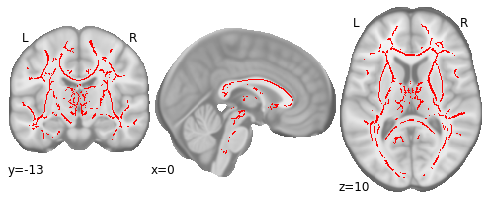

In [6]:
# You can also plot your results with Nilearn, in this case you'll use the maps not the arrays
# For example, you can plot your tfce map (controls > athletes) by simply doing:
from nilearn import plotting 
plotting.plot_stat_map(tfce_map_binarised, bg_img = bck_img_map, threshold = th,
                       black_bg = False, colorbar = False, draw_cross=False,
                       vmax = 1, cmap = 'red_transparent')

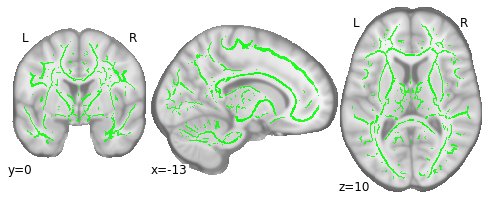

In [7]:
plotting.plot_stat_map(mean_FA_skeletonised_map, bg_img = bck_img_map, threshold = 0.2, #This threshold should be the one you used when creating the mean_FA map
                       black_bg = False, colorbar = False, draw_cross=False,
                       vmax = 1, cmap = 'green_transparent', cut_coords = [-13,0,10]) #you can change the MNI coords

In [8]:
# We can "join" your tfce map and the mean fa skeletonised as done here
# https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/TBSS/UserGuide to show where in the skeleton you found differences 
tfce_mean_FA_merged = image.math_img("img + np.where(img2>0.2,1,0)", img=tfce_map_binarised, img2 = mean_FA_skeletonised_map)


# The tfce_mean_FA_merged map will now have values = to 0, 1 or 2 where 1 corresponds to the mean_fa_skeletonised map
# that tells you which voxels you tested, and 2 corresponds to the voxels that were significant (controls > patients)

# More in detail: I binarised your tfce map so now the map only contains zeros or ones. Then I binarised the mean_fa map
# so again it will now contain only zeros or ones. Then, by doing img + np.where(img2>0.2,1,0) I am just summing the two
# maps so that the resulting map will have twos only where both the mean_fa and tfce_map had ones, and ones where only
# the skeleton map had ones. Basically it shows where in the skeleton you found significant results.

'''
From: https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/TBSS/UserGuide

You will probably next want to load the mean_FA_skeleton image on top of your background image, to show where
the skeleton was estimated, and which standard-space voxels were tested in the multi-subjects statistics.
Load mean_FA_skeleton into FSLView and set its display range correctly.
The lower threshold must be set to the threshold that you used in the TBSS analysis, for example 0.2.
The upper level should probably be set to something like 0.7, so that you can see variation in mean FA values
within the skeleton. You probably want to change the colourmap, for example to Green, and increase the transparency 
(with the transparency slider) so that when you load the stats image in, it is easier to see.
'''

'\nFrom: https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/TBSS/UserGuide\n\nYou will probably next want to load the mean_FA_skeleton image on top of your background image, to show where\nthe skeleton was estimated, and which standard-space voxels were tested in the multi-subjects statistics.\nLoad mean_FA_skeleton into FSLView and set its display range correctly.\nThe lower threshold must be set to the threshold that you used in the TBSS analysis, for example 0.2.\nThe upper level should probably be set to something like 0.7, so that you can see variation in mean FA values\nwithin the skeleton. You probably want to change the colourmap, for example to Green, and increase the transparency \n(with the transparency slider) so that when you load the stats image in, it is easier to see.\n'

In [1]:
plotting.plot_stat_map(tfce_mean_FA_merged, bg_img = bck_img_map, threshold = 0,
                       black_bg = False, colorbar = False, draw_cross=False,
                       cmap = 'jet', cut_coords = [-13,0,10],
                       output_file='tfce_MeanFA_merged.jpg') # You can save the plot

NameError: name 'plotting' is not defined

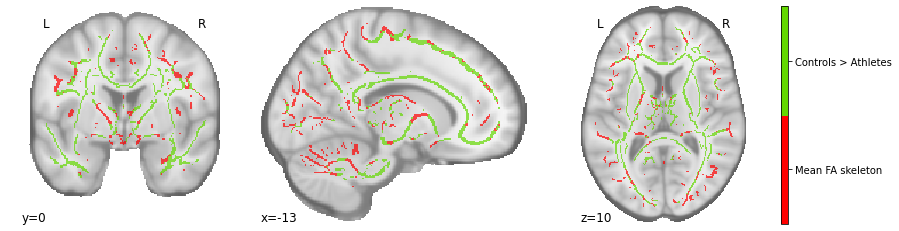

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colorbar, colors

#Or you can do it a bit fancier if you want

fig, (img_ax, cbar_ax) = plt.subplots(
    1,
    2,
    gridspec_kw={"width_ratios": [10.0, 0.1], "wspace": 0.0},
    figsize=(14, 4),
)

cmap = ListedColormap(["red", "#63d800"])  #You can change these two colours (https://www.w3schools.com/colors/colors_rgb.asp)
plotting.plot_roi(tfce_mean_FA_merged,
                  bg_img = bck_img_map,
                  cut_coords=(-13, 0, 10), #Slices to show
                  black_bg = False,
                  cmap=cmap,
                  axes=img_ax,
                  draw_cross = False,
                  annotate = True) # If you want to remove annotations

norm = colors.Normalize(vmin=0, vmax=2) # Cmap will have 2 levels
cbar = colorbar.ColorbarBase(
    cbar_ax,
    ticks=[0.5, 1.5],
    norm=norm,
    orientation="vertical",
    cmap=cmap,
    spacing="proportional",
)
cbar_ax.set_yticklabels(["Mean FA skeleton", "Controls > Athletes"])

plt.savefig('tfce_MeanFA_merged_fancy.jpg', dpi = 300, bbox_inches='tight') #This saves it at 300dpi for your thesis

In [11]:
# Now we want to save the results in a table, divided by ROI
# First, you can take a look at the atlas 
# The JHU atlas is just an image with values that are either 0 or a
# number from 1 to 48 (that corresponds to the areas in the db atlas_labels)
# i.e. voxels with values = 3 correspond to the Genu of Corpus callosum (id 3 in atlas_labels) etc. 

#This is the table with the tracts' ids and labels
atlas_labels


,id,name,abbr,category
0,1,Middle cerebellar peduncle,MCP,Brainstem
1,2,Pontine crossing tract,PCT,Brainstem
2,3,Genu of corpus callosum,gCC,Commissural
3,4,Body of corpus callosum,bCC,Commissural
4,5,Splenium of corpus callosum,sCC,Commissural
5,6,Fornix,FX,Association
6,7,Corticospinal tract R,CST.R,Brainstem
7,8,Corticospinal tract L,CST.L,Brainstem
8,9,Medial lemniscus R,ML.R,Brainstem
9,10,Medial lemniscus L,ML.L,Brainstem


In [12]:
plotting.plot_stat_map(atlas_map, bg_img = bck_img_map,
                       black_bg = False, colorbar = False, draw_cross=False,
                       cmap = 'tab20',
                       cut_coords = [-13,0,10],
                      output_file='JHU_atlas.jpg')

In [13]:
#This is not very pretty. You can open the MNI anatomical image with MRIcroGL and then add an overlay and select
#the JHU atlas and then you can lower the opacity of the anatomical image and do something like this
# the files are jhu_atlas_example_mosaic_-26_-4_18 and jhu_atlas_example.png
# here https://github.com/Davi93/fmri_scripts/tree/main/dti

In [14]:
# First let's sum up all the results


In [15]:
from nilearn.reporting import get_clusters_table
table_all_results = get_clusters_table(tfce_map, stat_threshold=0.95,
                                    cluster_threshold=20)
print(table_all_results)

C:\Users\davide\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:97: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


    Cluster ID     X     Y     Z  Peak Stat Cluster Size (mm3)
0            1  63.0 -34.0  -3.0      0.998                297
1           1a  60.0 -23.0 -11.0      0.998                   
2           1b  55.0  -5.0 -24.0      0.998                   
3            2  21.0 -90.0   6.0      0.998                 42
4            3  20.0 -73.0   4.0      0.998                 71
..         ...   ...   ...   ...        ...                ...
145        110 -32.0 -81.0  -4.0      0.972                 31
146        111  45.0  27.0  13.0      0.972                 33
147        112 -44.0  26.0  13.0      0.972                 21
148        113  36.0  26.0  29.0      0.972                 32
149        114  47.0 -24.0  28.0      0.972                 60

[150 rows x 6 columns]


In [16]:
# You can save the panda table by doing
table_all_results.to_csv('Table_all_results.csv')
# NB I'm reporting values only for clusters > 20. This is just to avoid making a huge table.
# However, running the FSL cluster command gives a different result. I wonder if it's because of the sub-peaks min distance

Cluster Index	Voxels	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)
4	82020	0.998	4	-36	-49	1.01	-15.5	10.6
3	51	0.95	31	-24	-22	26.9	-27.8	-17.3
2	9	0.95	27	-24	-23	25.6	-22.9	-22.9
1	3	0.95	-29	-4	-22	-28	-3.67	-21.3

In [17]:
from nilearn.image import new_img_like
# Anyway, you can decide what to report.
# If you want to report stats for the single JHU tracts you can do

#tracts = [[3,4,5],[7,8],[11,12,13,14]] this is if you want to "join" multiple tracts together, where every 
# [] is a group of tracts (i.e. 3,4,5 --> corpus callosum)

# or you can just report stats for every tract, in that case you should do
tracts = np.unique(atlas_data[atlas_data!=0]).astype(int)


csize = 20 #Custer size (this is just for the table) 
all_tables = [] #Array containing all the output tables

for group_tracts in tracts:
    
    atlas_masked = np.where(np.in1d(atlas_data, group_tracts).reshape(atlas_data.shape)==True,1,0)
    atlas_masked = new_img_like(atlas_map, atlas_masked, affine=None, copy_header=True)
    
    #plotting.plot_roi(atlas_masked, bg_img = bck_img_data, colorbar = False, dim = -0.1,
    #                      draw_cross=False, black_bg=False, cmap = 'red_transparent')
                        
    dti_masked = image.math_img("img * img2", img=tfce_map, img2 = atlas_masked) #Applying  mask
    
    this_table = get_clusters_table(dti_masked, stat_threshold=th,
                                    cluster_threshold=csize)
    
    this_table['Tracts'] = " ".join((atlas_labels['abbr'].loc[atlas_labels['id'].isin([group_tracts])].tolist()))
    
    this_table.drop('Peak Stat',axis=1, inplace=True) #I don't think it makes sense to report all the 0.998 values, maybe 
    # just say clusters with p <0.05 FWE
    
    all_tables.append(this_table)
    
for table in all_tables:
    print(table)


C:\Users\davide\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:97: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


  Cluster ID     X     Y     Z Cluster Size (mm3) Tracts
0          1  30.0 -56.0 -37.0               1171    MCP
1         1a  21.0 -55.0 -41.0                       MCP
2         1b  20.0 -63.0 -34.0                       MCP
3         1c  19.0 -51.0 -40.0                       MCP
4          2 -10.0 -32.0 -41.0               1005    MCP
5         2a -10.0 -22.0 -35.0                       MCP
6         2b -29.0 -46.0 -39.0                       MCP
7         2c -19.0 -50.0 -40.0                       MCP
8          3 -24.0 -56.0 -40.0                 34    MCP
   Cluster ID    X     Y     Z  Cluster Size (mm3) Tracts
0           1  4.0 -28.0 -26.0                  26    PCT
  Cluster ID    X     Y     Z Cluster Size (mm3) Tracts
0          1  0.0  28.0  10.0               1739    gCC
1         1a -1.0  27.0   0.0                       gCC
   Cluster ID    X     Y     Z  Cluster Size (mm3) Tracts
0           1  0.0  -5.0  27.0                3167    bCC
1           2 -9.0 -11.0  33.0

C:\Users\davide\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:217: UserWarning: Attention: No clusters with more than 20 voxels
  warnings.warn(


In [25]:
# Next, I have used a systematic review to focus on the results of three specific tracts which are the most commonly affected by mild TBI
# The tracts are: Corpus Callosum, Internal Capsule, Superior Longitudinal Fasciculus.
# I have identified the three tracts using the JHU atlas and grouped them together, this is done by:

tracts = [[3,4,5],[17,18,19,20,21,22],[41,42]] #this is if you want to "join" multiple tracts together, where every 
# [] is a group of tracts (i.e. 3-5 --> Corpus Callosum, 17-22 --> Internal Capsule, 41-42 --> Superior Longitudinal Fasciculus)

csize = 20 #Custer size (this is just for the table) 
all_tables_groups = [] #Array containing all the output tables

for group_tracts in tracts:
    
    atlas_masked = np.where(np.in1d(atlas_data, group_tracts).reshape(atlas_data.shape)==True,1,0)
    atlas_masked = new_img_like(atlas_map, atlas_masked, affine=None, copy_header=True)
    
    #plotting.plot_roi(atlas_masked, bg_img = bck_img_data, colorbar = False, dim = -0.1,
    #                      draw_cross=False, black_bg=False, cmap = 'red_transparent')
                        
    dti_masked = image.math_img("img * img2", img=tfce_map, img2 = atlas_masked) #Applying  mask
    
    this_table = get_clusters_table(dti_masked, stat_threshold=th,
                                    cluster_threshold=csize)
    
    this_table['Tracts'] = " ".join((atlas_labels['abbr'].loc[atlas_labels['id'].isin(group_tracts)].tolist()))
    
    this_table.drop('Peak Stat',axis=1, inplace=True) #I don't think it makes sense to report all the 0.998 values, maybe 
    # just say clusters with p <0.05 FWE
    
    all_tables_groups.append(this_table)
    
for table in all_tables_groups:
    print(table)
    

  Cluster ID     X     Y     Z Cluster Size (mm3)       Tracts
0          1  28.0 -56.0  14.0               6960  gCC bCC sCC
1         1a -20.0 -49.0  14.0                     gCC bCC sCC
2         1b -10.0 -37.0  19.0                     gCC bCC sCC
3         1c -20.0 -48.0  11.0                     gCC bCC sCC
4          2  -9.0 -11.0  33.0                 21  gCC bCC sCC
  Cluster ID     X     Y     Z Cluster Size (mm3)  \
0          1  23.0 -15.0  10.0               2004   
1         1a  12.0   0.0   1.0                      
2         1b  22.0 -13.0   8.0                      
3         1c  23.0  -2.0  18.0                      
4          2 -18.0  12.0   6.0               1740   
5         2a -10.0  -3.0  -2.0                      
6         2b -11.0  10.0  -4.0                      
7         2c -15.0  -7.0   2.0                      

                                    Tracts  
0  ALIC.R ALIC.L PLIC.R PLIC.L RIC.R RIC.L  
1  ALIC.R ALIC.L PLIC.R PLIC.L RIC.R RIC.L  
2  ALIC.R

In [ ]:
#To save the table for all three tracts just do:
all_tables_tosave = pd.concat(all_tables)
all_tables_tosave.to_csv('all_tables.csv')
all_tables_tracts_tosave = pd.concat(all_tables_tracts)
all_tables_tracts_tosave.to_csv('all_tables_tracts.csv')

In [20]:
# If you want the mean FA value for each tract you're interested in (or group of tracts) per participants / groups
# I believe that this is the approach 
# For example let's consider the same tracts as before

tracts = [[3,4,5],[17,18,19,20,21,22],[41,42]]
all_tracts_means = []
all_tracts_sd = []

for group_tracts in tracts:
    #For each tract / group of tracts create a mask
    print('Tracts: ')
    print(" ".join((atlas_labels['abbr'].loc[atlas_labels['id'].isin(group_tracts)].tolist())))
    atlas_masked = np.where(np.in1d(atlas_data, group_tracts).reshape(atlas_data.shape)==True,1,0)
    atlas_masked = new_img_like(atlas_map, atlas_masked, affine=None, copy_header=True) #Mask containing the tracts
    means = [] #means for each participant for each tract / group of tracts
    sds = [] #sd for each participant for each tract / group of tracts
    for participant in range(0,all_FA_skeletonised_map.shape[3]):
        print('Analysing participant: ' + str(participant+1))
        this_participant_sk_map = all_FA_skeletonised_map.get_fdata()[:,:,:,participant] #Map of the participant
        this_participant_sk_map = new_img_like(atlas_map, this_participant_sk_map, affine=None, copy_header=True)
        this_participant_sk_map_masked =  image.math_img("img * img2", img=this_participant_sk_map, img2 = atlas_masked) #Applying  mask
        mean = np.mean(this_participant_sk_map_masked.get_fdata()[atlas_masked.get_fdata()!=0])
        sd = np.std(this_participant_sk_map_masked.get_fdata()[atlas_masked.get_fdata()!=0])

        # The last command means: take the FA data from participant N, consider only the values that are 1 in the mask
        # and average them / or calculate sd (for that participant / tract) 
        
        print('Mean FA: ' + str(round(mean,3)))
        print('Std FA: ' + str(round(sd,3)))
        means.append(mean)
        sds.append(sd)

    all_tracts_means.append(means)
    all_tracts_sd.append(sds)

Tracts: 
gCC bCC sCC
Analysing participant: 1
Mean FA: 0.183
Std FA: 0.355
Analysing participant: 2
Mean FA: 0.171
Std FA: 0.33
Analysing participant: 3
Mean FA: 0.175
Std FA: 0.34
Analysing participant: 4
Mean FA: 0.176
Std FA: 0.34
Analysing participant: 5
Mean FA: 0.168
Std FA: 0.326
Analysing participant: 6
Mean FA: 0.178
Std FA: 0.345
Analysing participant: 7
Mean FA: 0.178
Std FA: 0.345
Analysing participant: 8
Mean FA: 0.176
Std FA: 0.34
Analysing participant: 9
Mean FA: 0.181
Std FA: 0.35
Analysing participant: 10
Mean FA: 0.177
Std FA: 0.343
Analysing participant: 11
Mean FA: 0.179
Std FA: 0.347
Analysing participant: 12
Mean FA: 0.174
Std FA: 0.338
Analysing participant: 13
Mean FA: 0.179
Std FA: 0.346
Analysing participant: 14
Mean FA: 0.176
Std FA: 0.341
Analysing participant: 15
Mean FA: 0.171
Std FA: 0.333
Analysing participant: 16
Mean FA: 0.168
Std FA: 0.326
Analysing participant: 17
Mean FA: 0.167
Std FA: 0.326
Analysing participant: 18
Mean FA: 0.173
Std FA: 0.336
Ana

In [27]:
# We analysed 3 group of tracts so your all_tracts_means will have 3 arrays, each with 28 values (14 controls 14 athletes)
#print('arrays in all_tracts_means: ' + str(len(all_tracts_means)))

# Next, to identify the mean FA values for controls and athletes for the corpus callosum (first group of tracts)
# you can simply do

# FA values for the corpus callosum (first group of tracts analized (hence position 0 in the array))
# for your controls (0:14)

# First group of tracts
print('First group of tracts')
print('Mean controls: ' + str(np.mean(all_tracts_means[0][0:14])))
print('SD controls: ' + str(np.std(all_tracts_means[0][0:14])))
# And for your athletes
print('Mean athletes: ' + str(np.mean(all_tracts_means[0][14:28])))
print('SD athletes: ' + str(np.std(all_tracts_means[0][14:28])))

#Second group of tracts
print('Second group of tracts')
print('Mean controls: ' + str(np.mean(all_tracts_means[1][0:14])))
print('SD controls: ' + str(np.std(all_tracts_means[1][0:14])))
# And for your athletes
print('Mean athletes: ' + str(np.mean(all_tracts_means[1][14:28])))
print('SD athletes: ' + str(np.std(all_tracts_means[1][14:28])))


#Third group of tracts
print('Third group of tracts')
print('Mean controls: ' + str(np.mean(all_tracts_means[2][0:14])))
print('SD controls: ' + str(np.std(all_tracts_means[2][0:14])))
# And for your athletes
print('Mean athletes: ' + str(np.mean(all_tracts_means[2][14:28])))
print('SD athletes: ' + str(np.std(all_tracts_means[2][14:28])))

First group of tracts
Mean controls: 0.17655042531746568
SD controls: 0.0038265565665924267
Mean athletes: 0.16526075114556488
SD athletes: 0.006182073756578667
Second group of tracts
Mean controls: 0.17885544600744369
SD controls: 0.004166538844028192
Mean athletes: 0.16724895957922842
SD athletes: 0.004930579718807231
Third group of tracts
Mean controls: 0.13925339207805623
SD controls: 0.005102242705357035
Mean athletes: 0.12764883527429022
SD athletes: 0.005212663223210904


In [28]:
# Identifying the mean FA values for controls and athletes for the internal capsule, do:
print('Mean IC controls: ' + str(np.mean(all_tracts_means[1][0:14])))
print('SD IC controls: ' + str(np.std(all_tracts_means[1][0:14])))
# And for your athletes
print('Mean IC athletes: ' + str(np.mean(all_tracts_means[1][14:28])))
print('SD IC athletes: ' + str(np.std(all_tracts_means[1][14:28])))

Mean IC controls: 0.17885544600744369
SD IC controls: 0.004166538844028192
Mean IC athletes: 0.16724895957922842
SD IC athletes: 0.004930579718807231


In [29]:
# Identifying the mean FA values for controls and athletes for the superior longitudinal fasciculus, do:
print('Mean SLF controls: ' + str(np.mean(all_tracts_means[2][0:14])))
print('SD SLF controls: ' + str(np.std(all_tracts_means[2][0:14])))
# And for your athletes
print('Mean SLF athletes: ' + str(np.mean(all_tracts_means[2][14:28])))
print('SD SLF athletes: ' + str(np.std(all_tracts_means[2][14:28])))

Mean SLF controls: 0.13925339207805623
SD SLF controls: 0.005102242705357035
Mean SLF athletes: 0.12764883527429022
SD SLF athletes: 0.005212663223210904


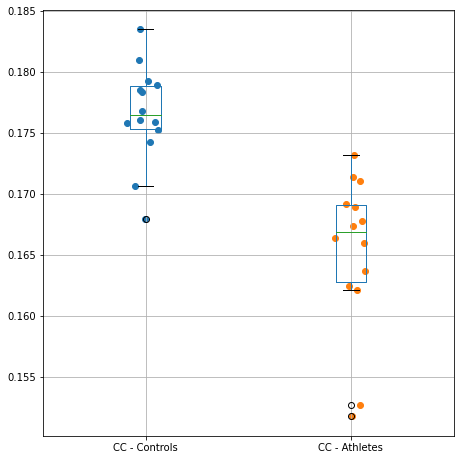

In [30]:
# For example you could make different tables for the tracts / group of tracts you're interested in
# (as done above when generating the tables)
# and then using the same group of tracts you can run the script above to generate the Mean and SD for controls / 
# athletes 

# you can make some plot box plots like this (here I am plotting results from the corpus callosum (index 0)
plt.rcParams["figure.figsize"] = [6.50, 6.50]
plt.rcParams["figure.autolayout"] = True
data = pd.DataFrame({"CC - Controls": all_tracts_means[0][0:14], "CC - Athletes": all_tracts_means[0][14:28]})
data.boxplot()

for i, d in enumerate(data):
   y = data[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(x, y)
plt.show()


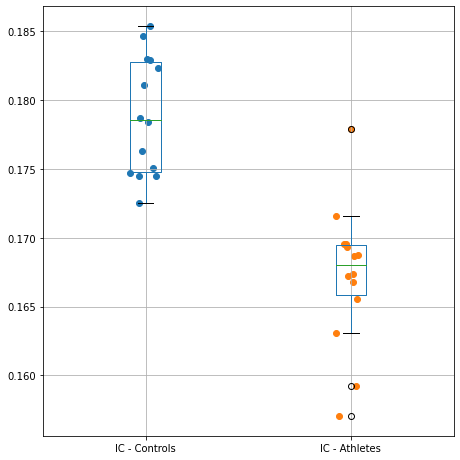

In [31]:
# The plot for the second set of tracts analysed (IC)
plt.rcParams["figure.figsize"] = [6.50, 6.50]
plt.rcParams["figure.autolayout"] = True
data = pd.DataFrame({"IC - Controls": all_tracts_means[1][0:14], "IC - Athletes": all_tracts_means[1][14:28]})
data.boxplot()

for i, d in enumerate(data):
   y = data[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(x, y)
plt.show()


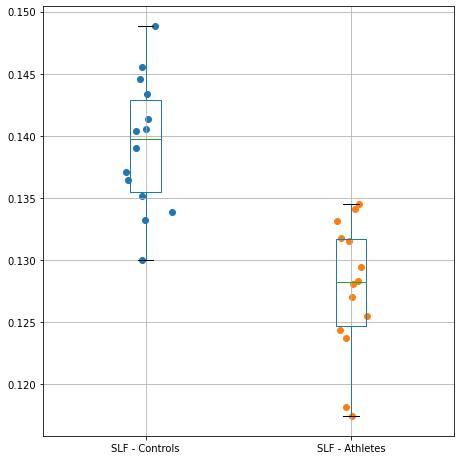

In [32]:
# The plot for the third set of tracts analysed (SLF)
plt.rcParams["figure.figsize"] = [6.50, 6.50]
plt.rcParams["figure.autolayout"] = True
data = pd.DataFrame({"SLF - Controls": all_tracts_means[2][0:14], "SLF - Athletes": all_tracts_means[2][14:28]})
data.boxplot()

for i, d in enumerate(data):
   y = data[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(x, y)
plt.show()


In [33]:
# Correlation analysis - examining the relationship between each tract and cognitive and clinical measures in the athletes

# The measures for each athlete: processing speed, working memory and symptom severity scores
p_speed = [520,500,480,515,440,500,520,500,460,520,560,450,480,420]
w_m = [4,4,4,4,2,4,4,3,3,4,4,4,4,3]
symp_sev = [3,17,8,6,27,11,5,17,0,41,43,41,12,20]


p value: 0.999943, r=-2.1e-05


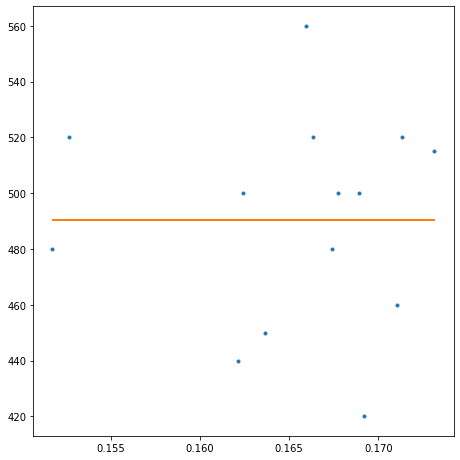

p value: 0.968178, r=-0.011758


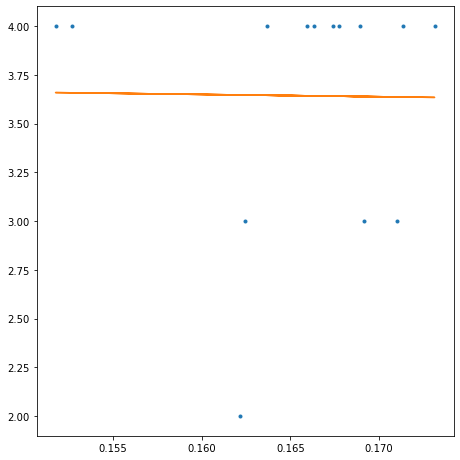

p value: 0.768319, r=-0.08666


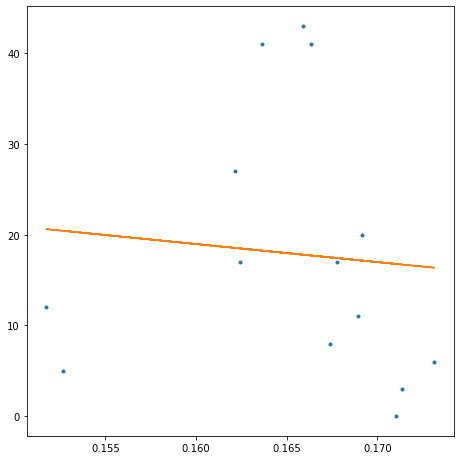

In [34]:
# Computing the correlation between FA values of the Corpus callosum and each cog/cli measure

import scipy.stats
x = all_tracts_means[0][14:28]
x = np.transpose(x)
#correlation with processing speed
y = p_speed
r,p  = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))

# If you want to add a plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#correlation with working memory
y = w_m
r,p  = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()
#correlation with sympt severity
y = symp_sev
r,p = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

p value: 0.746224, r=-0.095168


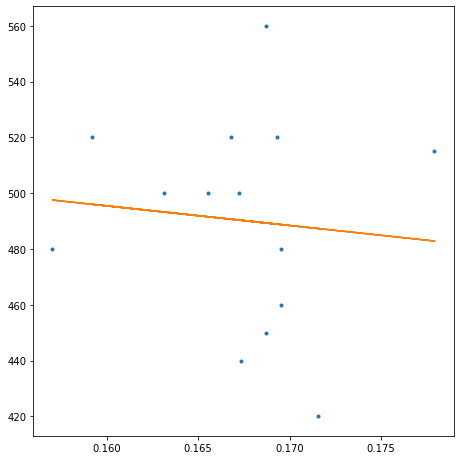

p value: 0.68088, r=-0.120771


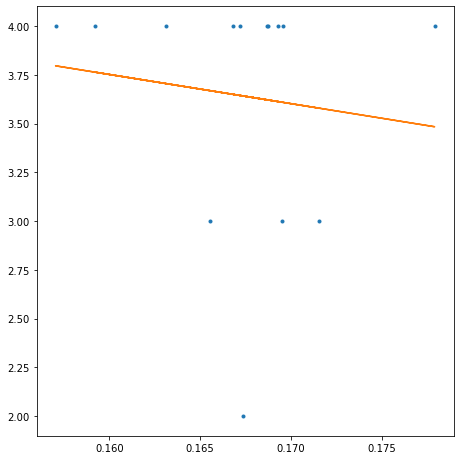

p value: 0.882157, r=0.043671


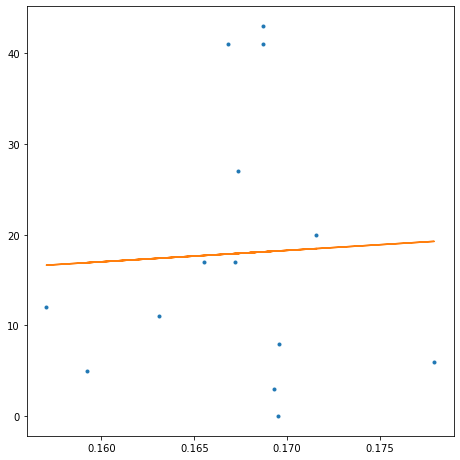

In [35]:
# Computing the correlation between FA values of the Internal Capsule and each cog/cli measure
x = all_tracts_means[1][14:28]
x = np.transpose(x)
#correlation with processing speed
y = p_speed
r,p  = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))

# If you want to add a plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#correlation with working memory
y = w_m
r,p  = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()
#correlation with sympt severity
y = symp_sev
r,p = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

p value: 0.748804, r=-0.094171


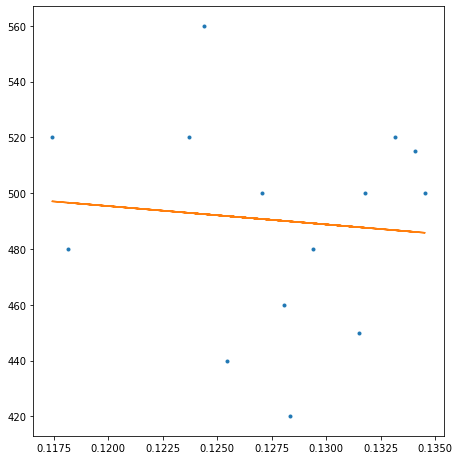

p value: 0.769481, r=0.086214


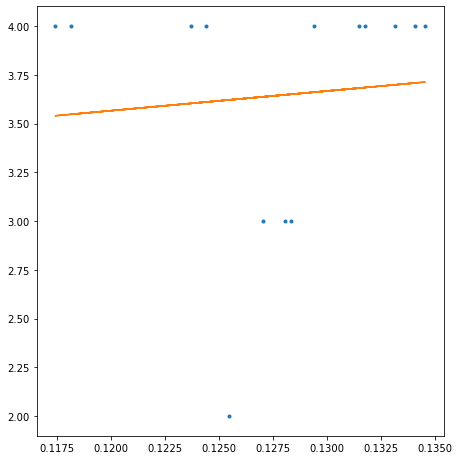

p value: 0.66513, r=-0.127057


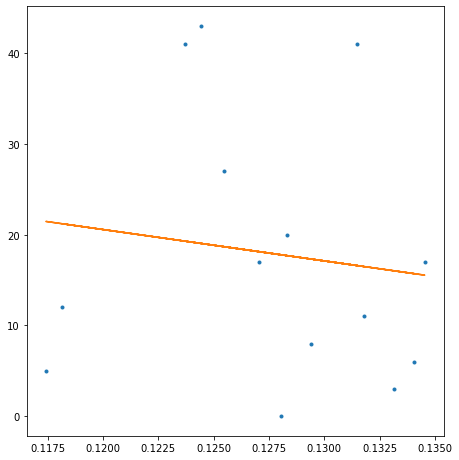

In [36]:
# Computing the correlation between FA values of the Superior Longitudinal Fasciculus and each cog/cli measure
x = all_tracts_means[2][14:28]
x = np.transpose(x)
#correlation with processing speed
y = p_speed
r,p  = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))

# If you want to add a plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#correlation with working memory
y = w_m
r,p  = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()
#correlation with sympt severity
y = symp_sev
r,p = scipy.stats.pearsonr(x, y)    # Pearson's r
print('p value: ' + str(round(p,6)) + ', r=' + str(round(r,6)))
b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()